# Avocado Project

In [1]:
from IPython.display import Image
Image(url= "https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F9%2F2017%2F08%2Favocado-seeds-useful-molecules-ft-blog0817.jpg&q=85")

# 1. Introduction

#### Avocado, first appeared in Mexico thousands of years ago,but it was not until 1871 that it was brought to California, United States. By the 1950s, there weredozens of varieties being sold in the markets of the country, with Fuerte being the most consumedvariety. About twenty years later, this situation changed, and the Hass avocado started to be the mostconsumed variety in the country and in the world.
#### Currently, 85% of the avocados produced and sold in the world are of the Hass variety. Thisvariety grows almost the whole year round and in different regions. Some of the leading producingcountries are Mexico, United States, Chile, Australia, South Africa and Israel, with Mexico being thelargest producer in the world, representing about a third of the worldwide production.
#### The UnitedStates is the leading country concerning imports, and has evolved towards a market of almost a million tons of avocados.
#### The avocado market has grown 16% every year since 2008 in the United States,and this trend is expected to continue, at least in the medium term. States like Florida, Californiaand Hawaii are producers of avocado in this country, but the production does not meet the marketdemands, so avocados are imported from Mexico, Chile, Peru, New Zealand and the DominicanRepublic, among other countries.
#### Collecting information on the market and on better practices concerning avocado cultivationwould be of great help to producers, vendors, associations, and companies. This could be used tochoose the right places to sell avocados, to carry out successful marketing campaigns or to developinnovations for the production and sales of such product. An example of this fact is that about fiftymillion dollars are spent annually on advertising and promotional activities on healthy avocadoconsumption.

###### 2. Materials and Methods
#### The weather is closely related to how much consumers spend inthe market. Variables such as temperature, humidity, snowfalls and sunlight can drastically affect sales.The process performed to obtain the dataset will be presented next.
###### 2.1. Data Sources
#### A dataset was built, for the training of the models, which contains records on weather and salesin several cities in the United States. We used the Hass Avocado Board program (HAB) as the sourceof the avocado market data andWeather Underground as the source of weather data.
#### The Hass Avocado Board is a program sponsored by the United States government and financed bya tax applied to all Hass avocados sold in the markets of the country, both imported or locally produced.
#### The majority of its funds are destined to advertising and promotion programs

# 2.Dataset Information

#### This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here’s how the Hass Avocado Board describes the data on their website:
#### The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. green skins) are not included in this table.
#### The avocado, a tree likely originating from south-central Mexico, is classified as a member of the flowering plant family Lauraceae. The fruit of the plant, also called an avocado, is botanically a large berry containing a single large seed.

# 3. Details about the dataset

#### Date: The date of the observation
#### AveragePrice: The average price of a single avocado
#### Total Volume: Total number of avocados sold
#### 4046: Total number of avocados with PLU 4046 sold
#### 4225: Total number of avocados with PLU 4225 sold
#### 4770: Total number of avocados with PLU 4770 sold
#### Total Bags
#### Small Bags
#### Large Bags
#### XLarge Bags
#### type: conventional or organic
#### year: The year
#### region: The city or region of the observation

# 4.Importing All Necessary libraries

In [4]:
# IMPORTS LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset

# 5.Reading the Csv file

In [5]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that AveragePrice are label columns while remaning are the Features columns.

# 6.EDA - Exploratory Data Analysis

#### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [6]:
df.shape

(18249, 14)

#### By using shape I got 7752 rows and 25 columns.

In [7]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Also, most of the column are float in nature and Date is of object data type.

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.drop('Date',inplace=True,axis=1)
df.drop('Unnamed: 0',inplace=True,axis=1)

In [10]:
df.shape

(18249, 12)

#### After using dupllicates I can see there is no duplicate value in this dataset.
#### Here, i am dropping Date and Unnamed: 0 column as it is unwanted.

In [11]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

#### By Using nunique I got an idea of continuous & Categorical Columns.
#### As in this Dataset most of the columns are continuous to predict Avacado Prices.

In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [13]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### From the Above statistics data show that their multiple outliers mostly in ('AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','XLarge Bags').
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### a) Also, number of rows in each column are not same, means there is no null values present in the data set.
#### b) Also, the mean and 50%value of most of the column are same and the STD and mean have a major difference to each other.
#### c) Most of the column statistics data are near to 0 values.
#### d) By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

# 7. Data Visualizations

### Data visualization
### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.


### According to my perception I have done below Data visualization in this Project.

## Strip Plot
### A strip plot is a graphical data anlysis technique for summarizing a univariate data set.A strip chart is handy when taking a look at a small set of one-dimensional data. It shows all the data, and since there aren't too many points cluttering the plot, it is informative.A strip is basically a scatter plot where the x axis represents a categorical variable While Y represents Label Column of the Dataset.
## Cat Plot
### Catplot shows frequencies of the categories of one, two or three categorical variables.This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
## Bar Plot
### A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.
## Line Plot
### A line plot is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments.
## Histogram Plot
### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.¶
## Distribution Plot
### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension.  In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.
## Scatter Plot
### A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded, one additional variable can be displayed.

### Handling Categorical Columns

### type vs AveragePrice

In [13]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

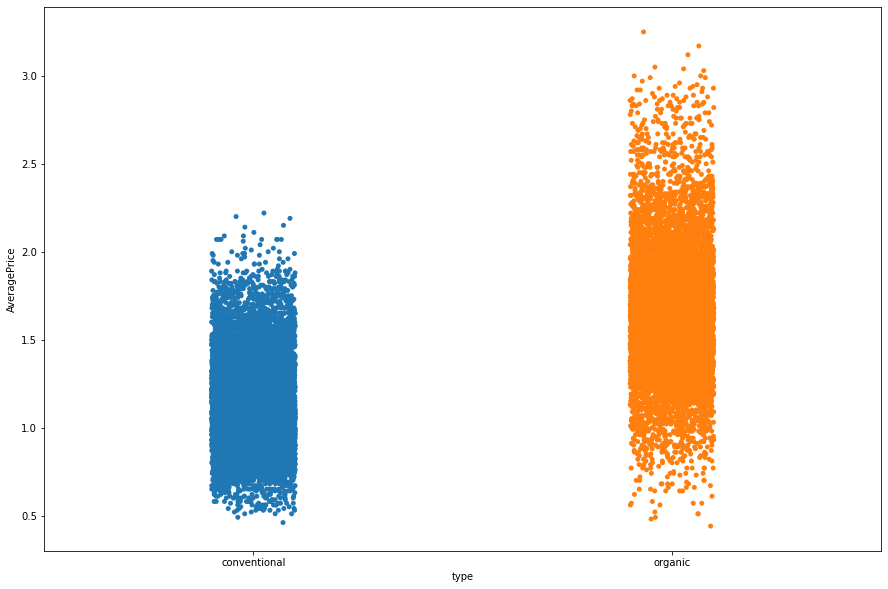

In [14]:
plt.figure(figsize=(15,10))
sns.stripplot(df['type'],df['AveragePrice'])

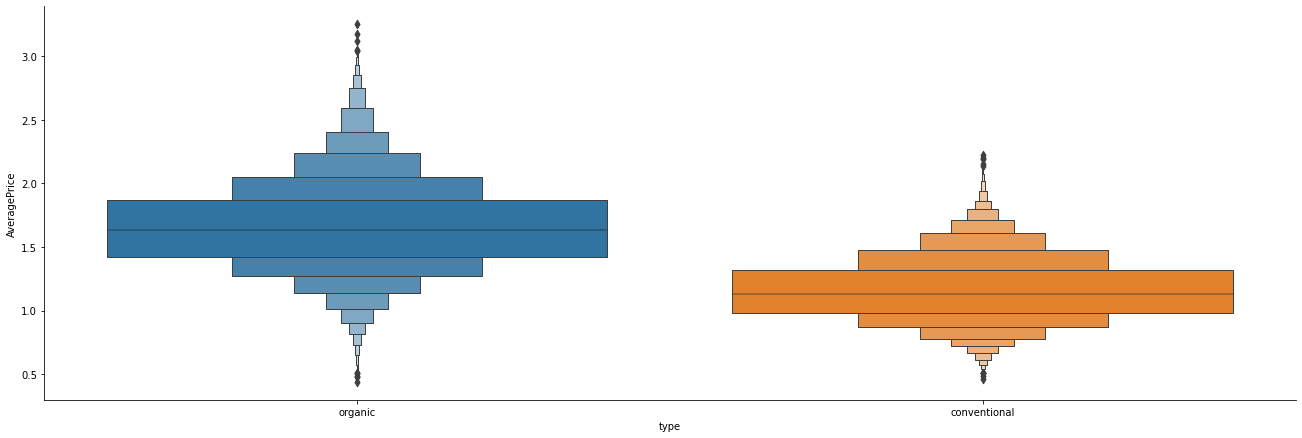

In [15]:
# type vs AveragePrice
sns.catplot(y = "AveragePrice", x = "type", data = df.sort_values("AveragePrice", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

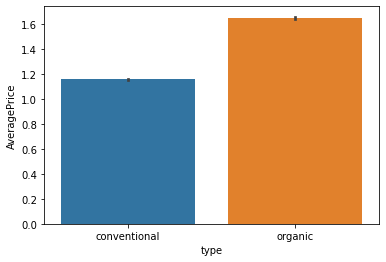

In [20]:
sns.barplot(x="type",y="AveragePrice",data=df)

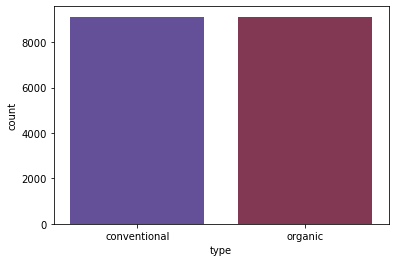

In [12]:
sns.countplot(df['type'],palette='twilight',data=df);

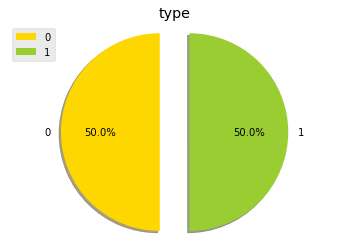

In [13]:
#  pie plot of type 

labels = ['0', '1']
value = [9126, 9123]
colors = ['gold','yellowgreen']
explode = [0.3,0]# 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'fraud_reported')
plt.style.use('ggplot')
plt.title('type')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

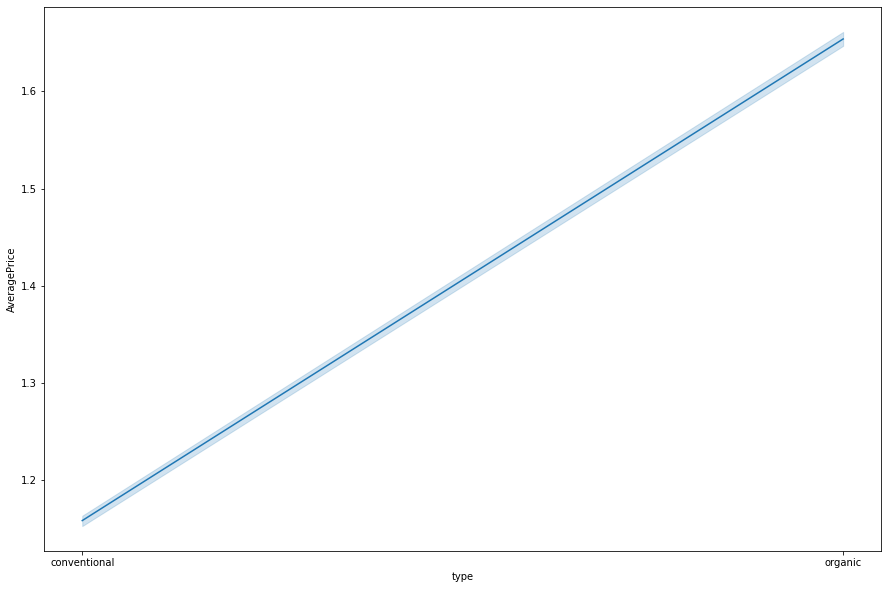

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'type', y = 'AveragePrice', data=df)

#### From The Above Plots And Charts I can see conventional type avacados with 9126 values are more demanding in market While comparing with AveragePrice label.

### year

In [16]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

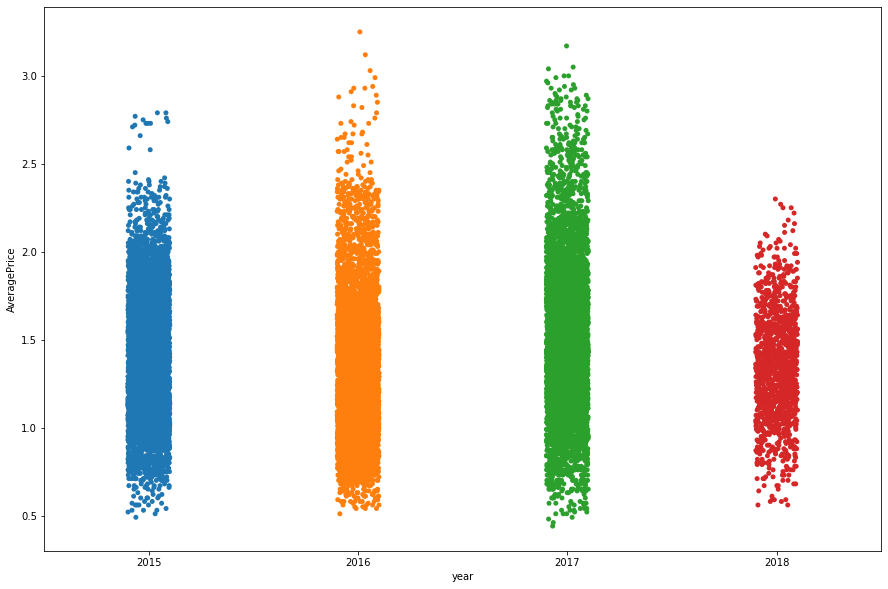

In [17]:
plt.figure(figsize=(15,10))
sns.stripplot(df['year'],df['AveragePrice'])

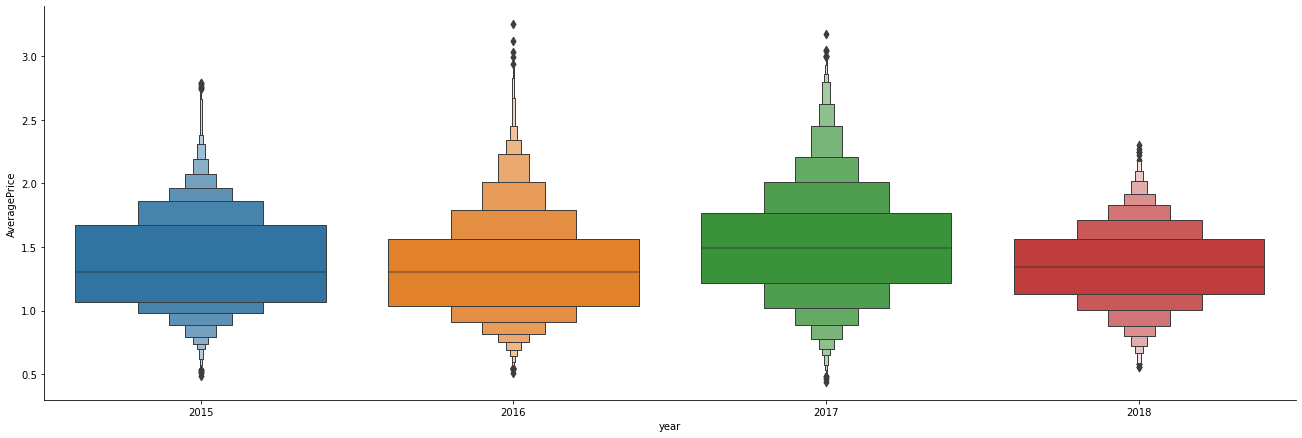

In [18]:
# year vs AveragePrice
sns.catplot(y = "AveragePrice", x = "year", data = df.sort_values("AveragePrice", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

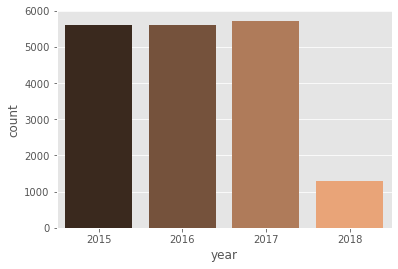

In [15]:
sns.countplot(df['year'],palette='copper',data=df);

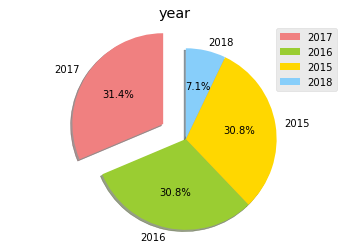

In [16]:
#  pie plot of year 

labels = ['2017', '2016', '2015' , '2018']
value = [5722, 5616, 5615, 1296]
colors = ['lightcoral','yellowgreen', 'gold', 'lightskyblue']
explode = [0.3,0,0,0]# 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'fraud_reported')
plt.style.use('ggplot')
plt.title('year')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

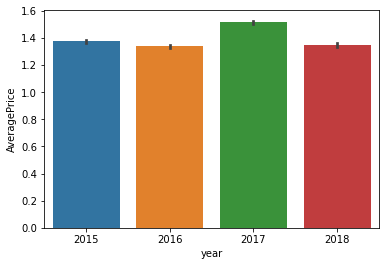

In [19]:
# checking the ratio of year and price that which year have a maximum average price.

sns.barplot(x="year",y="AveragePrice",data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

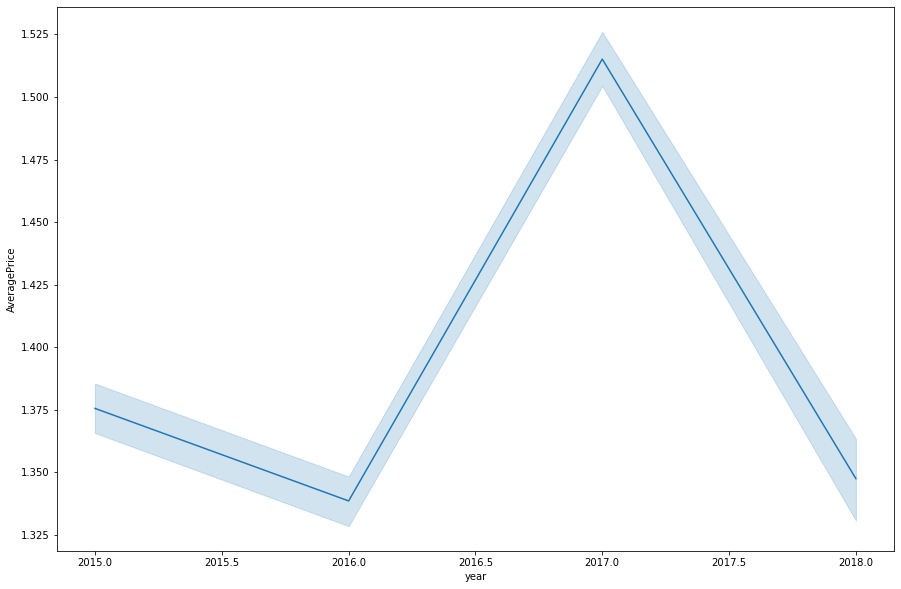

In [22]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)

#### Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

# Handling Continious Columns

### region

In [14]:
df['region'].value_counts()

Jacksonville           338
Atlanta                338
NorthernNewEngland     338
Philadelphia           338
SanFrancisco           338
GrandRapids            338
Spokane                338
Charlotte              338
Indianapolis           338
Boise                  338
SouthCarolina          338
Syracuse               338
RaleighGreensboro      338
StLouis                338
TotalUS                338
MiamiFtLauderdale      338
Plains                 338
HarrisburgScranton     338
Midsouth               338
SanDiego               338
Northeast              338
Boston                 338
NewOrleansMobile       338
SouthCentral           338
Portland               338
CincinnatiDayton       338
Denver                 338
BuffaloRochester       338
BaltimoreWashington    338
Southeast              338
Albany                 338
LasVegas               338
GreatLakes             338
RichmondNorfolk        338
Chicago                338
Orlando                338
Seattle                338
W

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

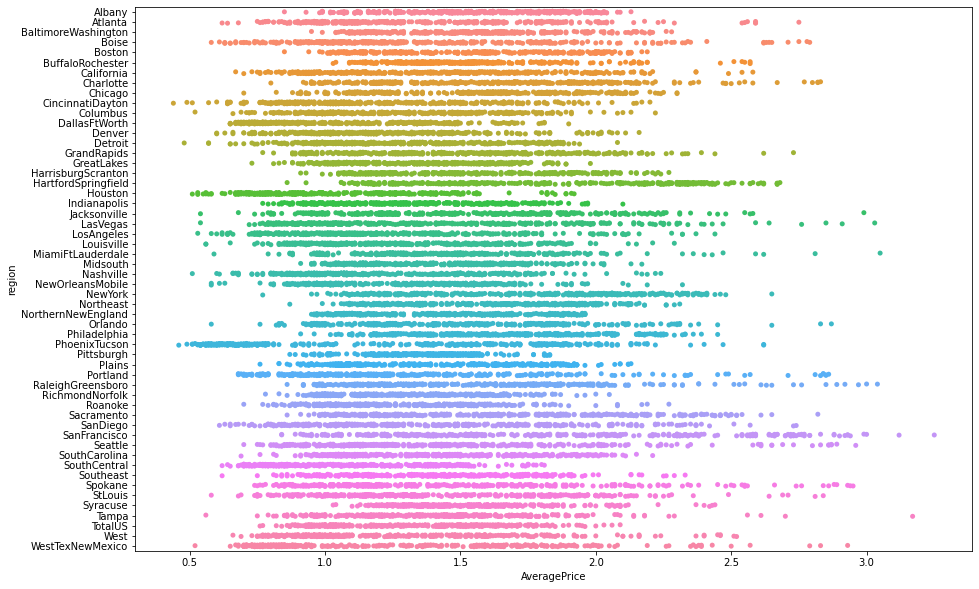

In [25]:
plt.figure(figsize=(15,10))
sns.stripplot(df['AveragePrice'],df['region'])

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

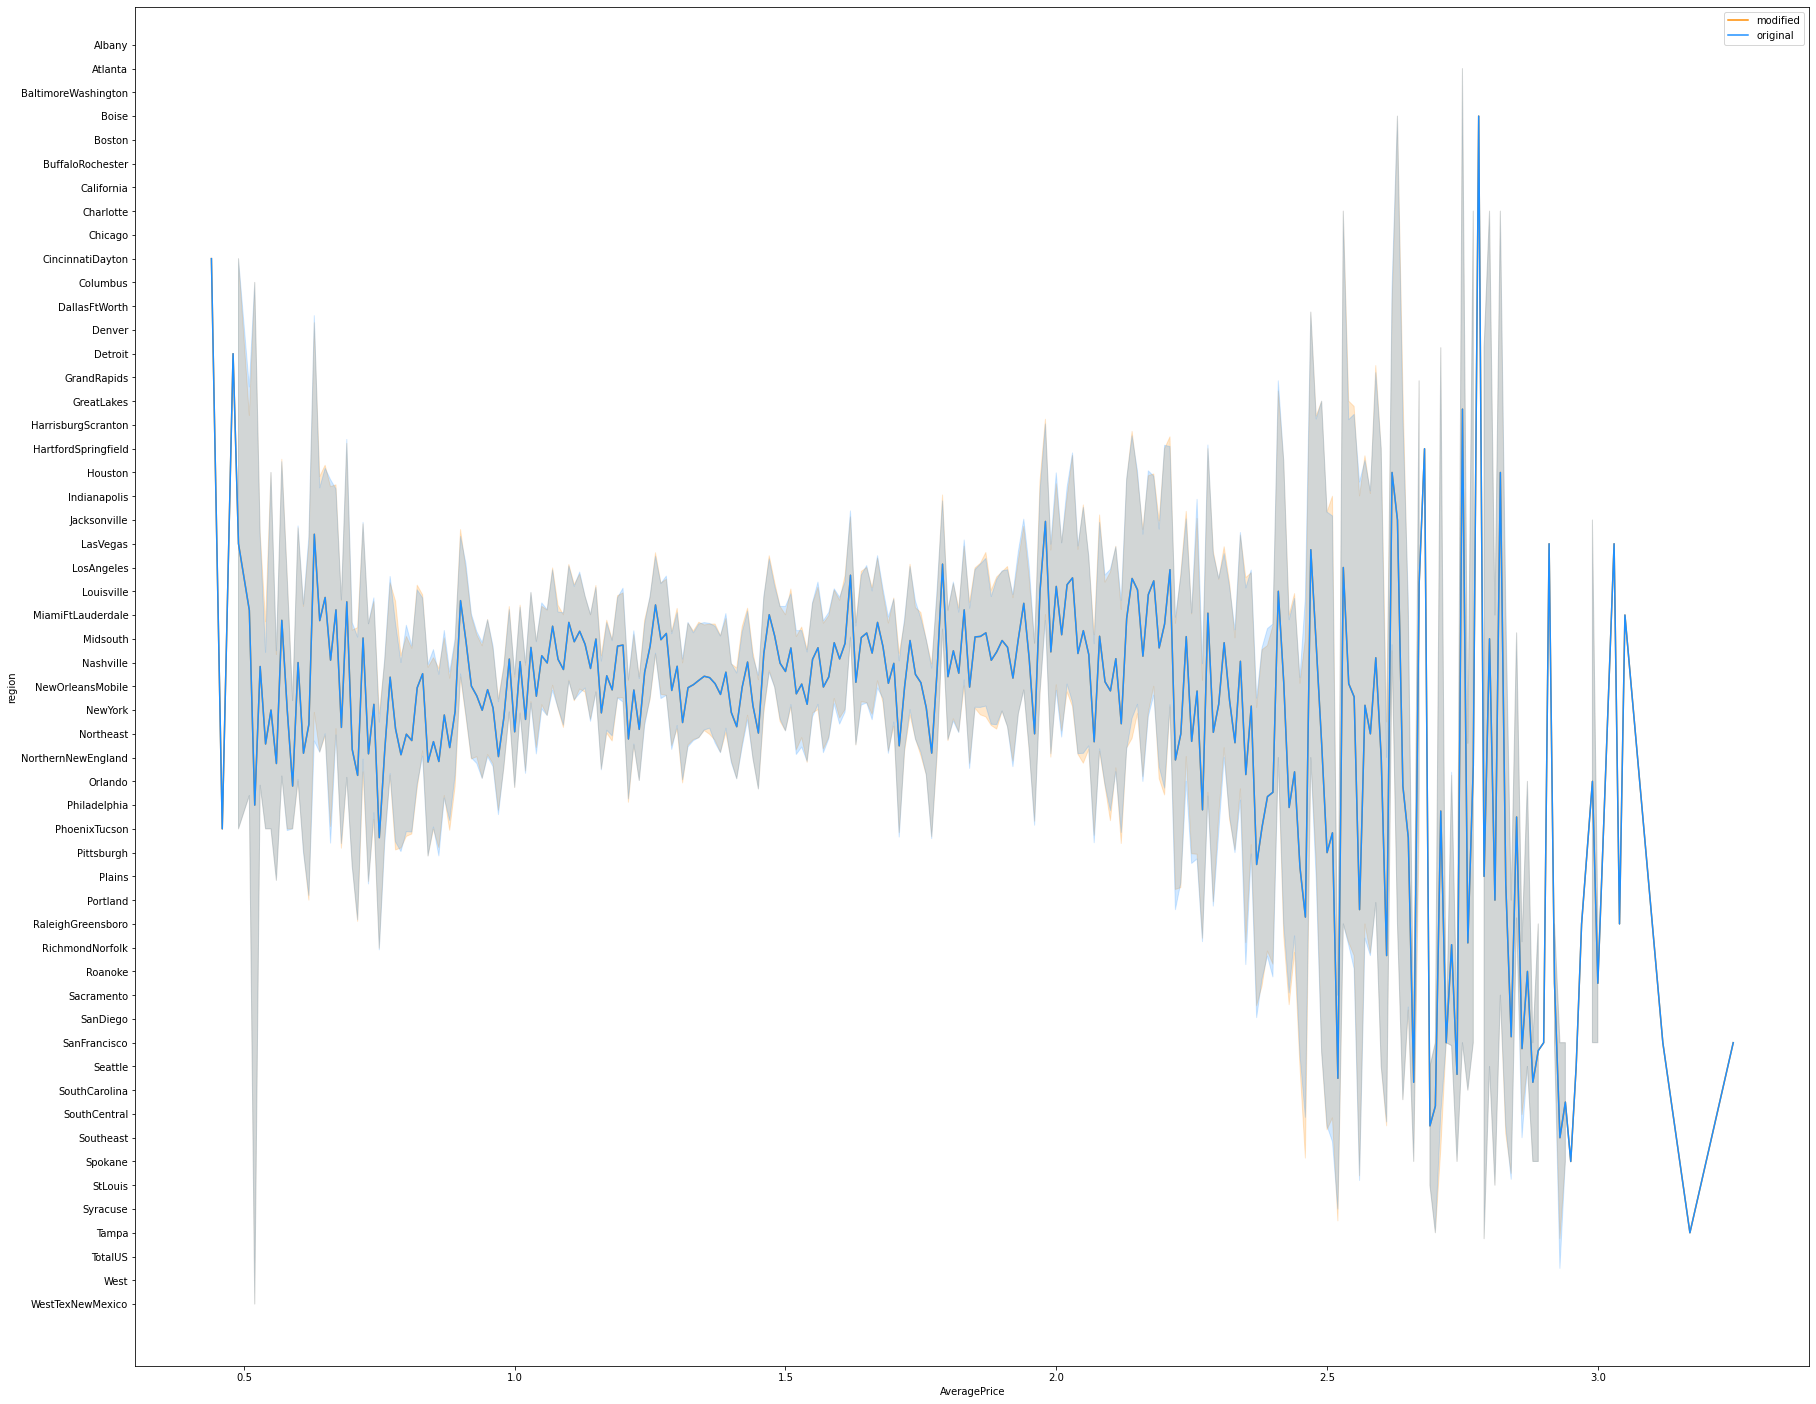

In [26]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['AveragePrice'], y=df['region'].interpolate(), color='darkorange', label = 'modified')
sns.lineplot(x=df['AveragePrice'], y=df['region'].fillna(np.inf), color='dodgerblue', label = 'original')

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

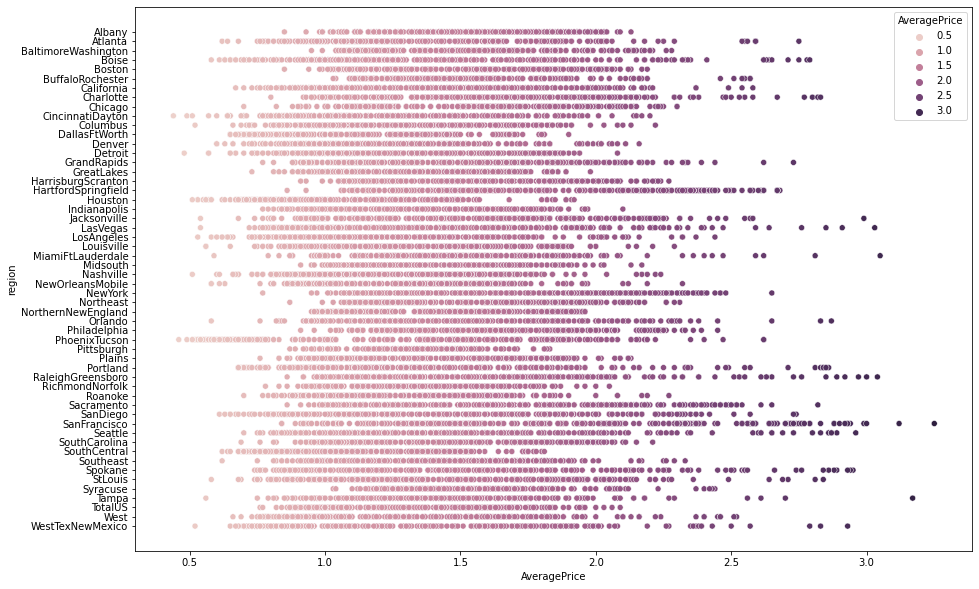

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='AveragePrice',y='region',data=df,hue='AveragePrice')

#### From The Above Plots And Charts I can see Jacksonville region avacados are best avacados rather than other cities  While comparing with AveragePrice label.

## Label Encoder

#### LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels

In [11]:
le = LabelEncoder()
df.region = le.fit_transform(df.region)
df.type = le.fit_transform(df.type)

In [12]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


#### After applying label encoder I watch there are zero values in this dataset.

## Replacing all the zero values columns

In [14]:
# Replacing continous columns with mean
df['4046'] = df['4046'].replace(0,df['4046'].mean())
df['4225'] = df['4225'].replace(0,df['4225'].mean())
df['4770'] = df['4770'].replace(0,df['4770'].mean())
df['Total Bags'] = df['Total Bags'].replace(0,df['Total Bags'].mean())
df['Small Bags'] = df['Small Bags'].replace(0,df['Small Bags'].mean())
df['Large Bags'] = df['Large Bags'].replace(0,df['Large Bags'].mean())
df['XLarge Bags'] = df['XLarge Bags'].replace(0,df['XLarge Bags'].mean())
df['region'] = df['region'].replace(0,df['region'].mean())


In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.971957e+04,2.398362e+05,1.837821e+05,6.139498e+04,5157.291024,0.499918,2016.147899,26.986384
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.065084e+05,9.862184e+05,7.459830e+05,2.430763e+05,17391.406970,0.500014,0.939938,15.152901
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.108010e+03,3.125050e+03,9.187500e+02,3106.426507,0.000000,2015.000000,14.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.992521e+04,2.787623e+04,7.942080e+03,3106.426507,0.000000,2016.000000,26.495644
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,2.283974e+04,1.112384e+05,8.620928e+04,5.433809e+04,3106.426507,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


#### Checking with describe After Replacing zero values now my Dataset is beeter to resume for Model Predictions.

## Using AveragePrice Label for predicting

In [16]:
# Divinding dataset into features and label
y=df['AveragePrice']
x=df.drop(columns=['AveragePrice'])

In [17]:
df.shape

(18249, 12)

#### Hence dividing Dataset in Features & labels.¶

# Histogram plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
#### THe following are some of the characteristics of histograms:
#### a)provides us a count of the number of observations in each bin created for visualization.
#### b)From the shape of the bin, I can easily observe the distribution i.e. avacados price it is Gaussian, skewed or exponential.
#### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>]], dtype=object)

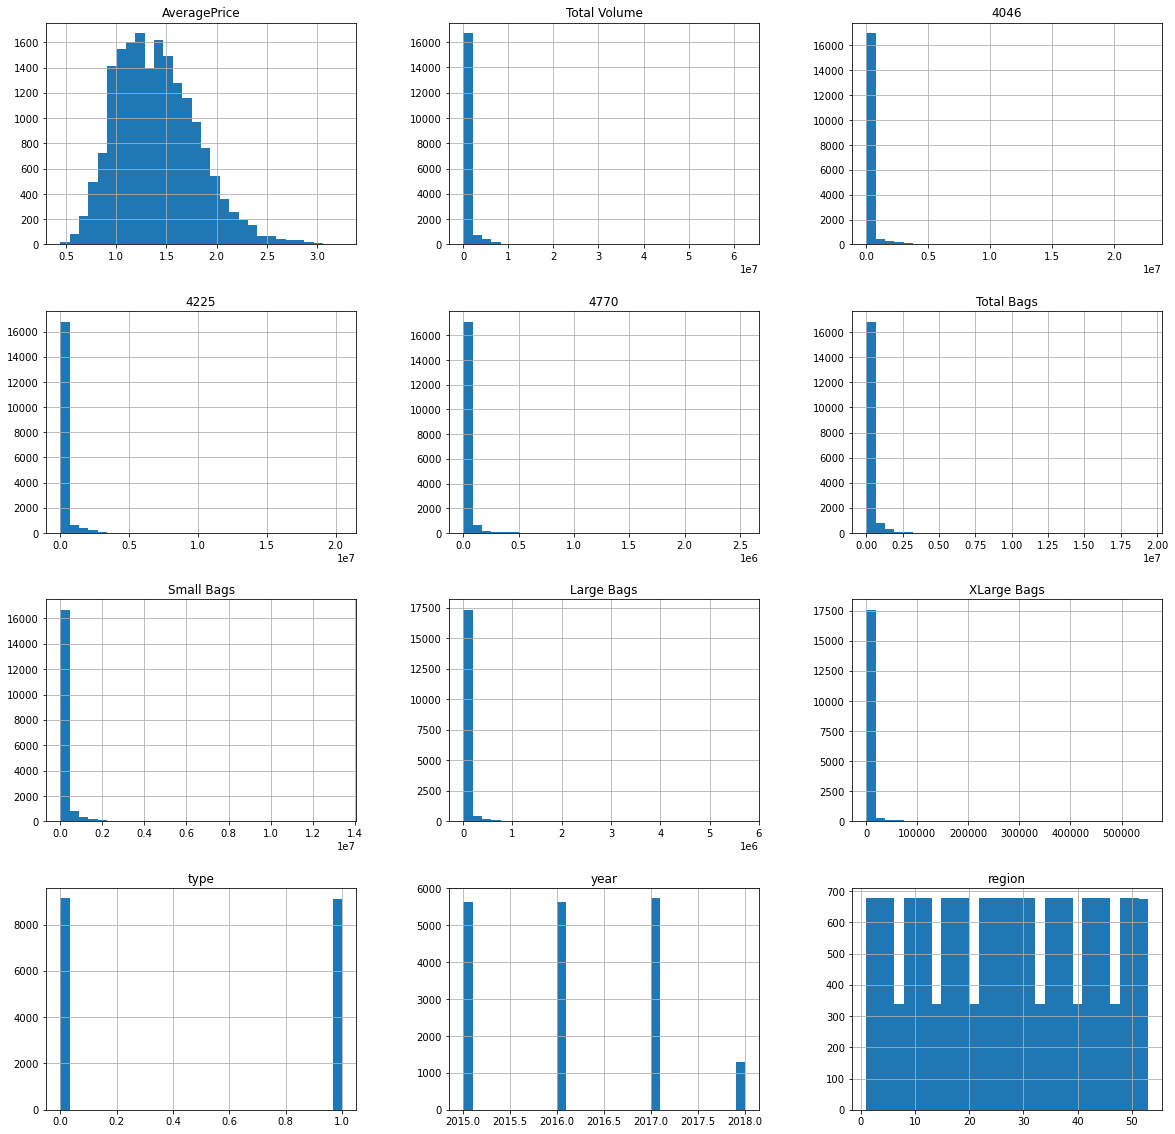

In [18]:
# using the the histogrom plot 

df.hist(figsize=(20,20),grid=True,layout=(4,3),bins=30)

#### By making Histogram Plot I can see there are some skewness in this dataset.
#### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

# Factor Plot

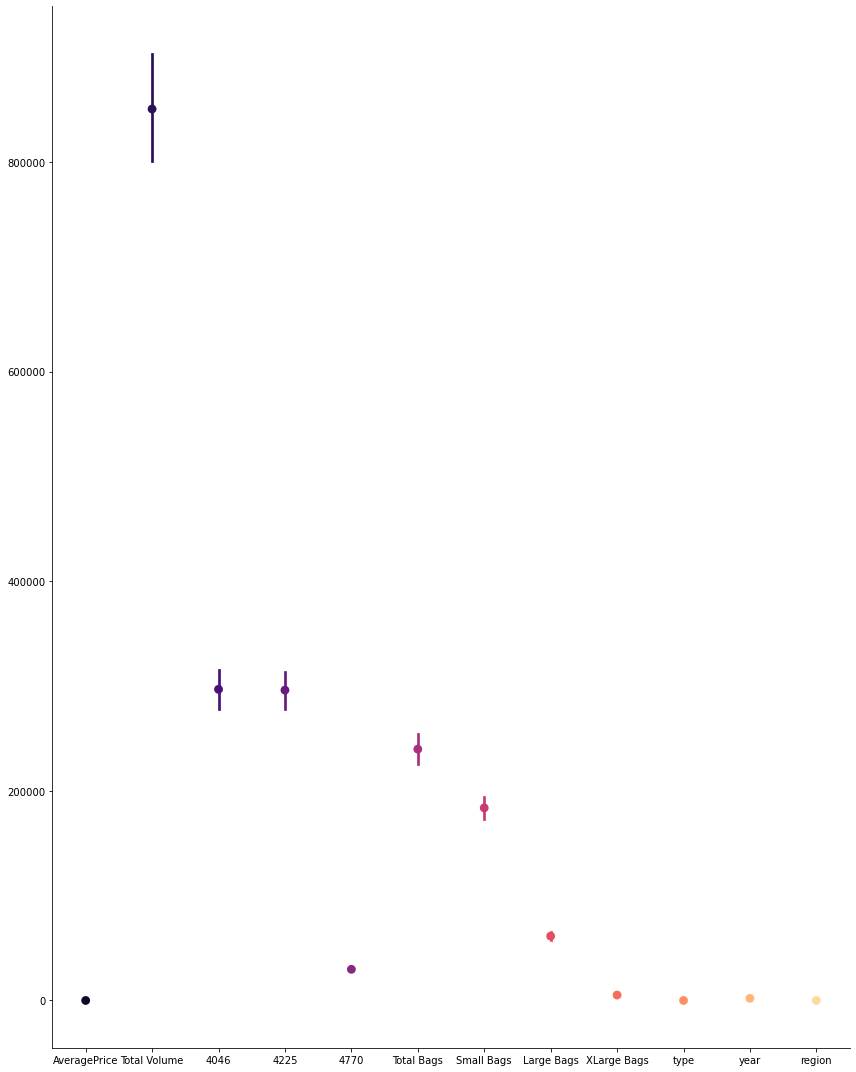

In [19]:
sns.factorplot(data=df,
        
                   aspect=0.8,
                   height=15,
                   size=15,
                   palette='magma',
                   join=False,
              )

#### By making Factor Plot I can see there are some skewness in this dataset.
#### rom plotting this Factr plot, I used the ascpect  size as 0.8,height=15, size=15 and palette='magma'.

# Distribution Plot

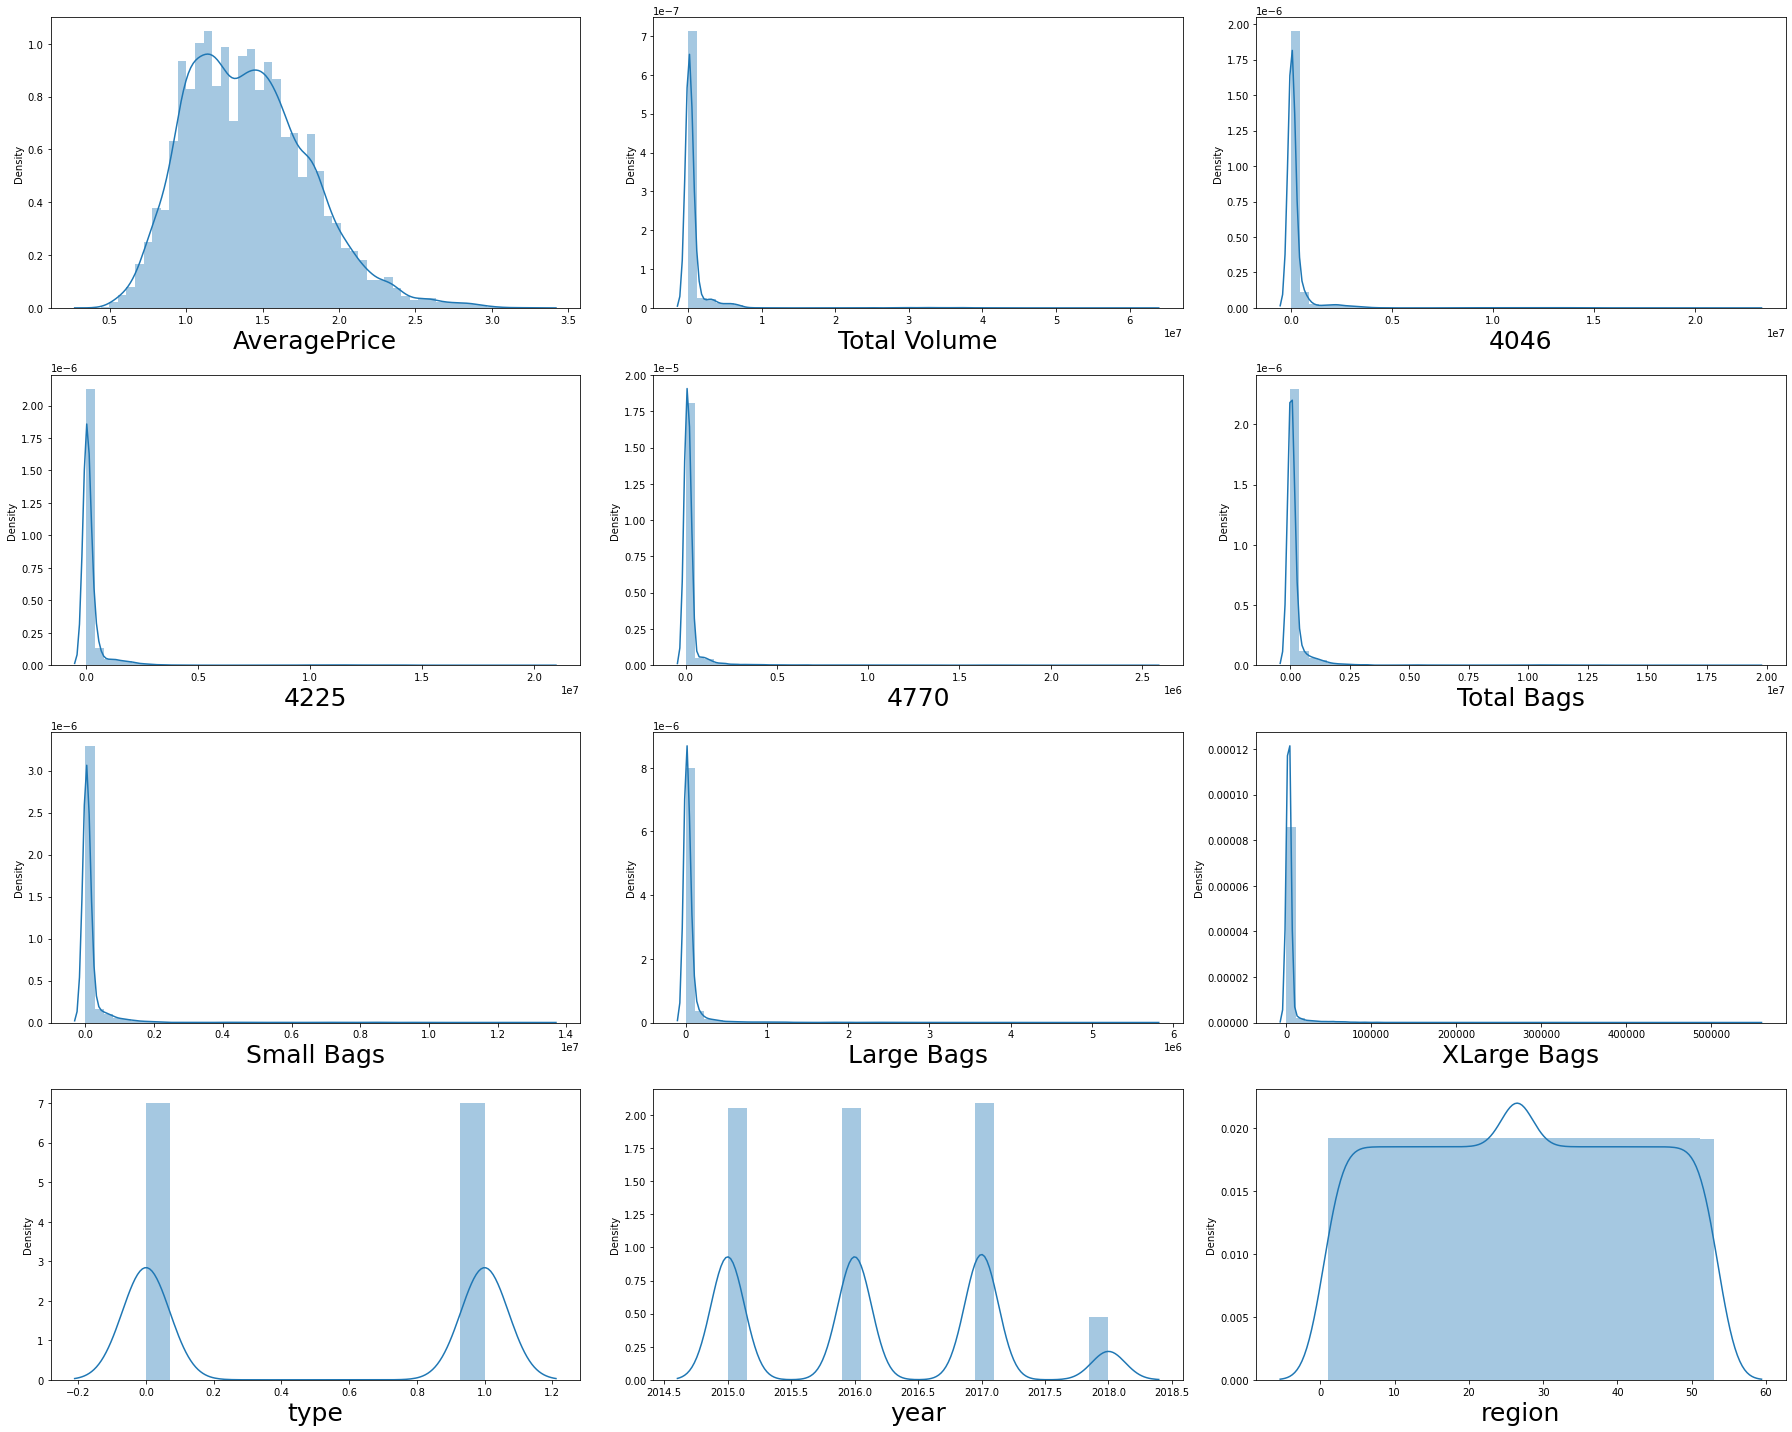

In [20]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### From the above  Distribution Plot I can see that there are skewness in this dataset.

# Box Plot

#### In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

AveragePrice        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Total Volume     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
4046             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
4225               AxesSubplot(0.125,0.518913;0.227941x0.16413)
4770            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total Bags      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Small Bags         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Large Bags      AxesSubplot(0.398529,0.321957;0.227941x0.16413)
XLarge Bags     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
type                  AxesSubplot(0.125,0.125;0.227941x0.16413)
year               AxesSubplot(0.398529,0.125;0.227941x0.16413)
region             AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

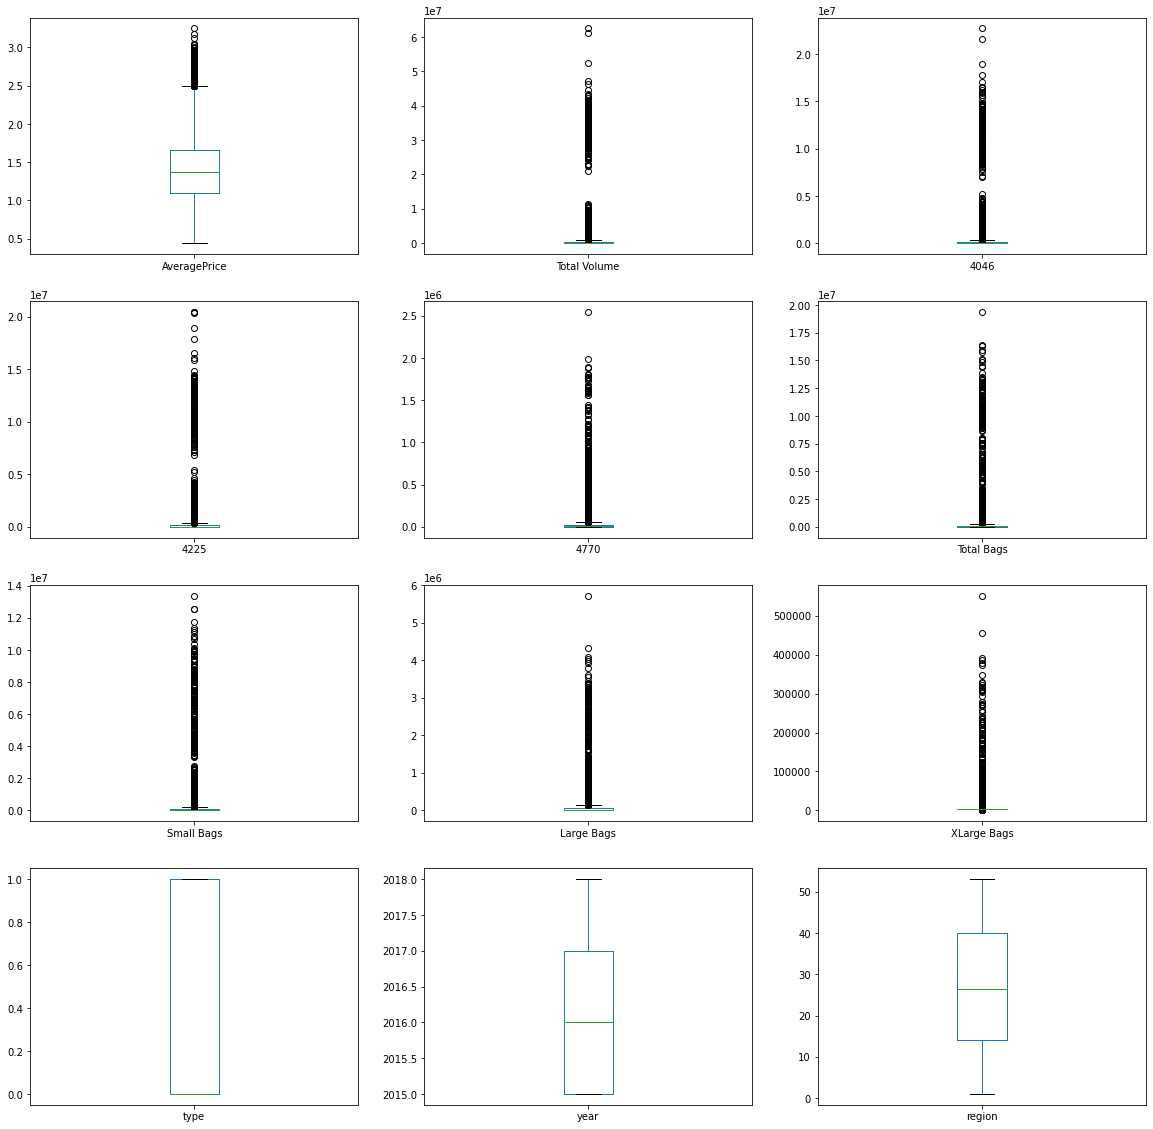

In [21]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20))

#### From above image I can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
#### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.

# Z score

In [22]:
z_score = zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]

In [23]:
df.shape

(17665, 12)

#### I am using zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.
#### So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
#### After, removing the outlier’s final there are 17605 and 12 column presents in the data set.

## Ploting Histogram Plot & Distibution Plot after  removing the skewness

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>]], dtype=object)

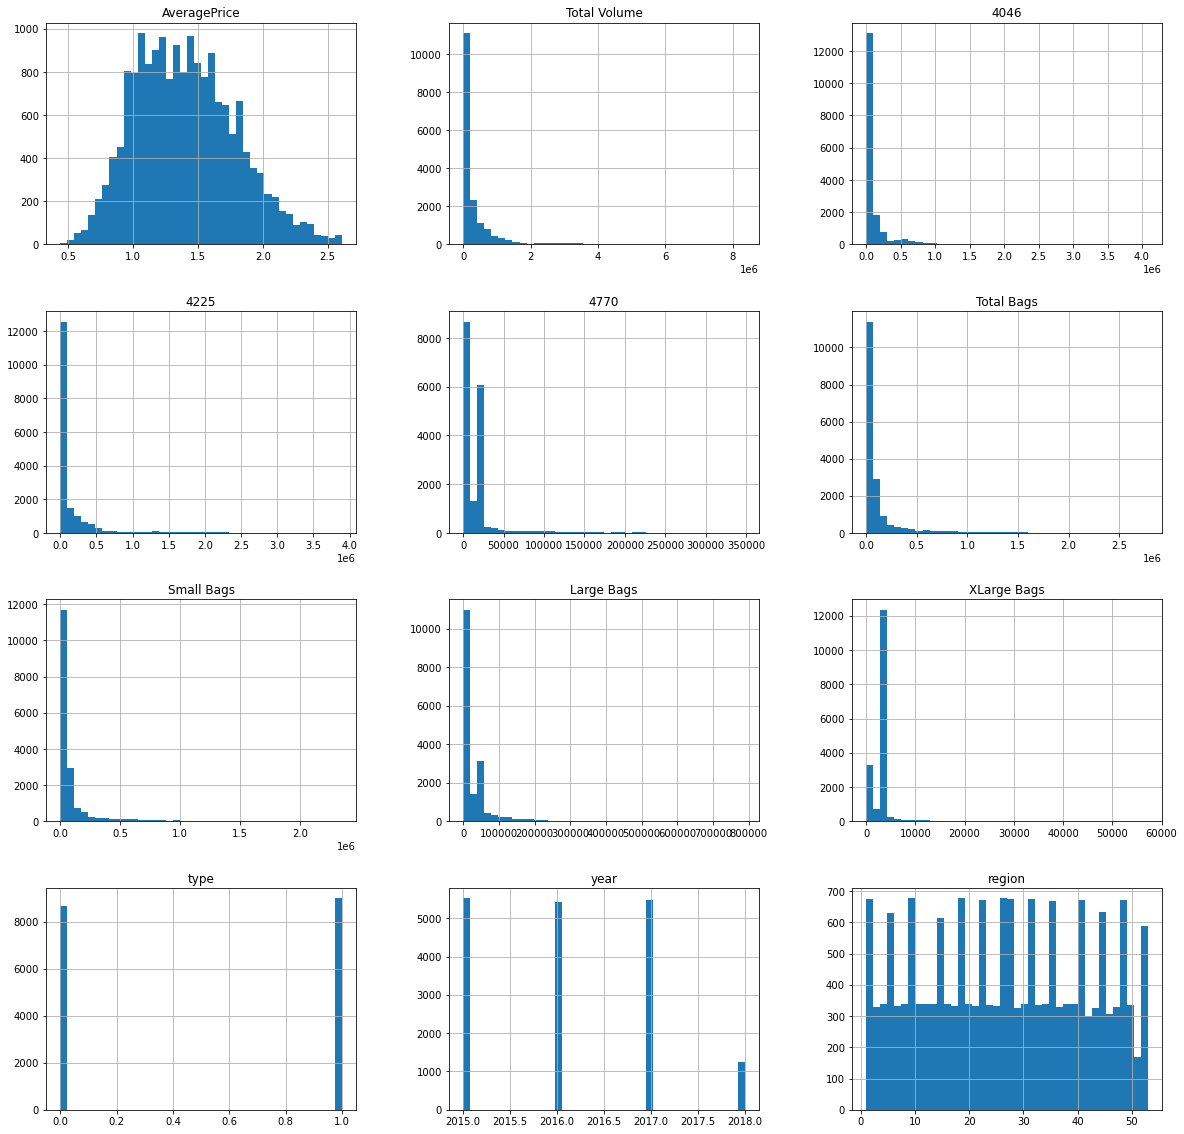

In [24]:
df.hist(figsize=(20,20),grid=True,layout=(4,3),bins=40)

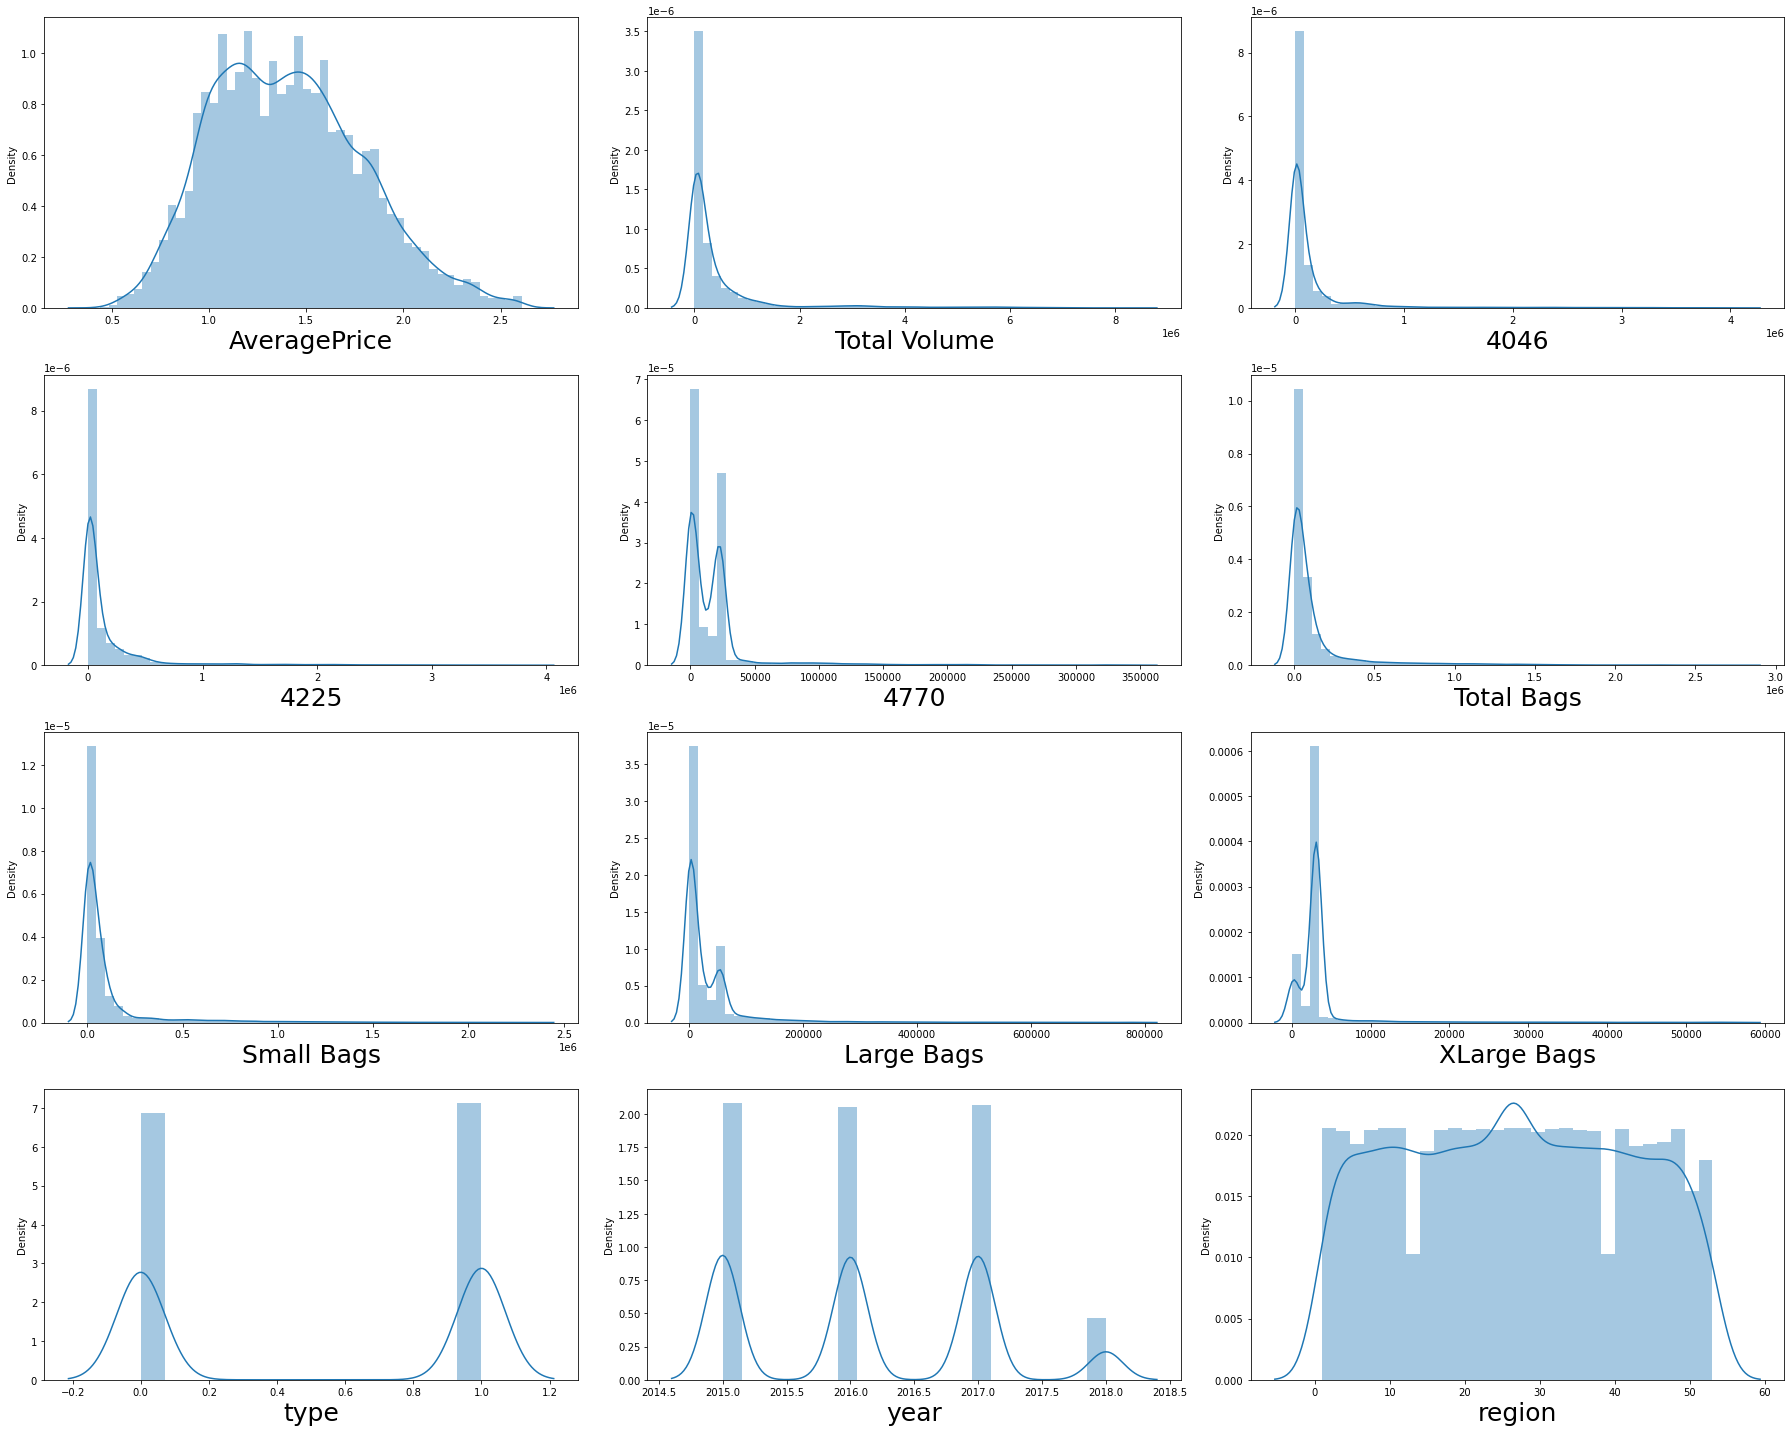

In [25]:
# checking distribution plot after removing skewness 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### Hence After Rmoving Outliers I make distribution plot & HIstogram Plot which shows outliers are removed.

# Finding correlation of features vs target using corrwith

In [26]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice)

Total Volume   -0.332348
4046           -0.328848
4225           -0.243949
4770           -0.142565
Total Bags     -0.296826
Small Bags     -0.270862
Large Bags     -0.205638
XLarge Bags    -0.047525
type            0.613347
year            0.091384
region          0.010296
dtype: float64

### Visualize the correlation

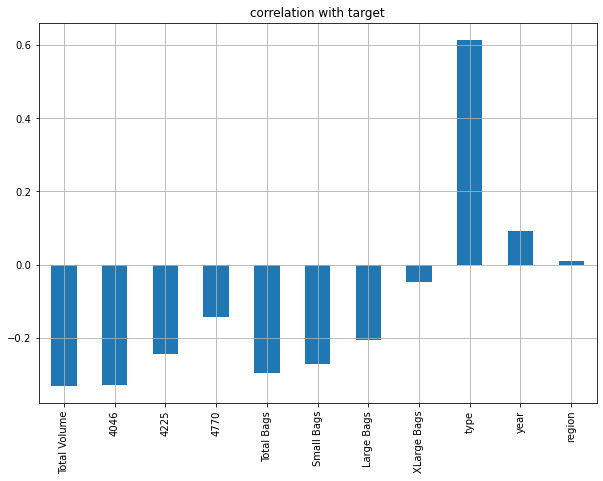

In [27]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 3 columns are positively related to target value.

# Correlation

#### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.
Denoted by r, it takes values between -1 and +1.

In [28]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.332348,-0.328848,-0.243949,-0.142565,-0.296826,-0.270862,-0.205638,-0.047525,0.613347,0.091384,0.010296
Total Volume,-0.332348,1.000000,0.873332,0.870840,0.574009,0.912467,0.903222,0.602648,0.426268,-0.415461,-0.003458,0.064011
4046,-0.328848,0.873332,1.000000,0.562941,0.436759,0.725808,0.703038,0.529025,0.343512,-0.332944,-0.032523,0.111423
4225,-0.243949,0.870840,0.562941,1.000000,0.552276,0.756747,0.774909,0.418459,0.310007,-0.381089,-0.039889,0.000073
4770,-0.142565,0.574009,0.436759,0.552276,1.000000,0.485799,0.502145,0.254784,0.425002,-0.126815,-0.080206,-0.136986
Total Bags,-0.296826,0.912467,0.725808,0.756747,0.485799,1.000000,0.975587,0.707428,0.502813,-0.377572,0.103885,0.072913
Small Bags,-0.270862,0.903222,0.703038,0.774909,0.502145,0.975587,1.000000,0.552287,0.522078,-0.360674,0.081754,0.056069
Large Bags,-0.205638,0.602648,0.529025,0.418459,0.254784,0.707428,0.552287,1.000000,0.220951,-0.222737,0.072953,0.118677
XLarge Bags,-0.047525,0.426268,0.343512,0.310007,0.425002,0.502813,0.522078,0.220951,1.000000,-0.085786,0.073443,-0.051538
type,0.613347,-0.415461,-0.332944,-0.381089,-0.126815,-0.377572,-0.360674,-0.222737,-0.085786,1.000000,0.003491,0.018449


#### Now I am finding the correlation value of each column, this value is categorized into mainly 2 parts that are:
##### Positive correlated value
##### Negative correlated value The most the value is positive means that column is much co related and vice versa.

# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

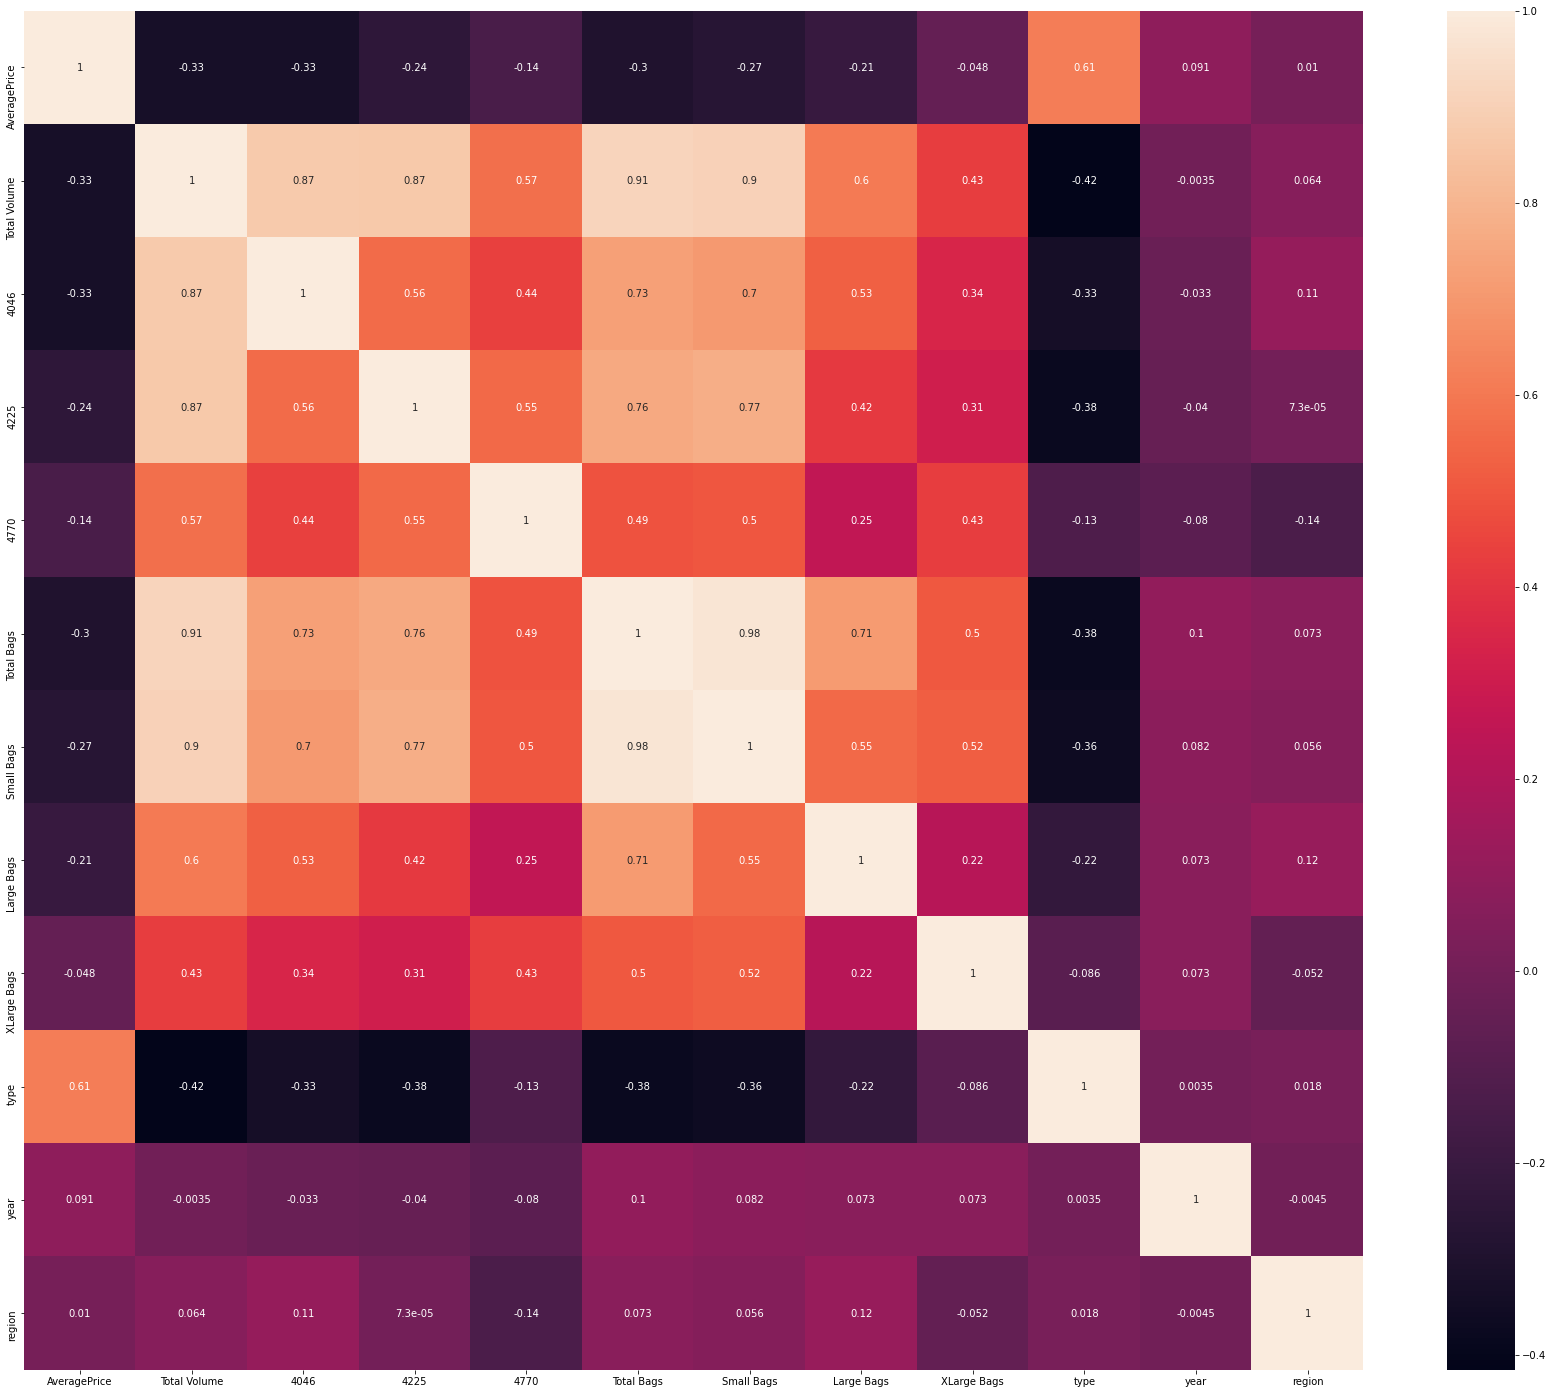

In [29]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

# 8. Machine Learning

# StandardScaler

In [31]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.22771641, -0.23397205, -0.2007418 , ..., -0.99983562,
        -1.22128204, -0.03238681],
       [-0.23042664, -0.23425869, -0.20889489, ..., -0.99983562,
        -1.22128204, -0.03238681],
       [-0.21208462, -0.23416346, -0.15531293, ..., -0.99983562,
        -1.22128204, -0.03238681],
       ...,
       [-0.24233073, -0.23384933, -0.2439341 , ...,  1.00016441,
         1.97050371,  1.71678868],
       [-0.24162464, -0.23358384, -0.24349534, ...,  1.00016441,
         1.97050371,  1.71678868],
       [-0.24125273, -0.23250267, -0.24401438, ...,  1.00016441,
         1.97050371,  1.71678868]])

#### Applying the standard scaler to scaled the dataset in one range & on x variable

# VIF - variance inflation factor

##### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [32]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7611.994070,Total Volume
1,1017.578319,4046
2,945.370360,4225
3,11.972957,4770
4,2606.494933,Total Bags
5,1116.518952,Small Bags
6,117.883761,Large Bags
7,3.887921,XLarge Bags
8,1.260031,type
9,1.093327,year


#### According to my concern about vif in this dataset all the values are more than than 10 and overall model variance there is multicollinearity exists.

# Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting Next_Tmax label first, I have used these Algorithmns for Model Building:
#### a)Linear Regression model
#### b)Random Forest Regressor Model
#### c)Decision Tree Regressor Model
#### d)AdaBoost Regressor

# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Using the train test split to divide the datset into training and testing dataset with size 0.25.
#### In this data into training and testing with 75 percent Training and 25 percent testing.

# Linear Regression model

#### Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

In [40]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

#### First I have to fit the Training data of LinearRegression.

In [41]:
# adjusted r2 score
rg.score(x_train,y_train)

0.4184559659873881

In [42]:
rg.score(x_test,y_test)

0.4158976922845077

In [43]:
y_pred = rg.predict(x_test)
y_pred

array([1.11598164, 1.56705128, 1.10658843, ..., 1.15171241, 1.1801308 ,
       1.49983529])

## Scatter plot of Linear Regression

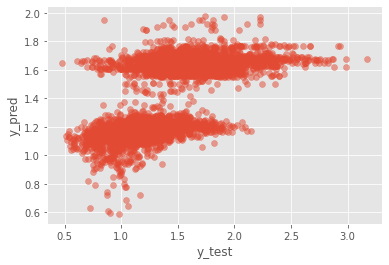

In [44]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [45]:
mean_squared_error(y_test,y_pred)

0.09757234274378414

# RMSE

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.31236571954006753

# r2 score

In [47]:
r2_score(y_test,y_pred)

0.4158976922845077

## Linear Regression model - 41.58%

### In prediction Linear Regression model with Average Prices:
##### I had done this prediction by taking Average Prices as an output variable which is continuity in nature so that why I’m using the regression technique.
##### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
##### After calculating adjusted R2 score I used Scatter plot of Linear Regression,MSE,and RMSE I got r2 score of Linear Regression model - 41.58%

## Random Forest Regressor Model

### Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [48]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

#### First I have to fit the Training data of RandomForestRegressor.

In [49]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9769636492675682

In [50]:
rf.score(x_test,y_test)

0.8363809899206202

In [51]:
y_pred = rf.predict(x_test)
y_pred

array([1.2346, 1.6399, 1.3632, ..., 0.8077, 1.6001, 1.6492])

## Scatter plot of Random Forest Regressor Model

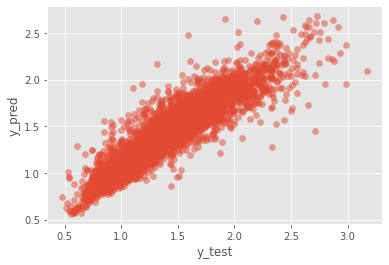

In [52]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [53]:
mean_squared_error(y_test,y_pred)

0.027332010026298485

## RMSE

In [54]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.16532395478665057

## r2 score

In [55]:
r2_score(y_test,y_pred)

0.8363809899206202

## Random Forest Regressor Model 83.63%

#### In prediction Random Forest Regressor with Average Prices:
#### I had done this prediction by taking Average Prices as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of Random Forest Regressor,MSE,and RMSE I got r2 score of Random Forest Regressor - 83.63%

# Decision Tree Regressor Model

##### Decision tree builds regression in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [56]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

#### First I have to fit the Training data of DecisionTreeRegressor.

In [57]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [58]:
dt.score(x_test,y_test)

0.6844635364116265

In [59]:
y_pred = dt.predict(x_test)
y_pred

array([1.25, 1.6 , 1.38, ..., 0.83, 1.49, 1.85])

### Scatter plot of Decision Tree Regressor Model

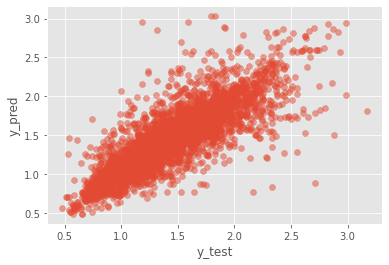

In [60]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [61]:
mean_squared_error(y_test,y_pred)

0.052709314047775575

## RMSE

In [62]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.22958509108340544

## r2 score

In [63]:
r2_score(y_test,y_pred)

0.6844635364116265

## Decision Tree Regressor Model - 68.44%

### In prediction Decision Tree Regressor Modelr with AveragePrices:
##### I had done this prediction by taking AveragePrices as an output variable which is continuity in nature so that why I’m using the regression technique.
##### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
##### After calculating adjusted R2 score I used Scatter plot of  Decision Tree Regressor Model - 80.80%,MSE,and RMSE I got r2 score of Decision Tree Regressor Model - 68.44%

# AdaBoost Regressor

#### An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.
#### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [64]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

#### First I have to fit the Training data of AdaBoostRegressor.

In [65]:
# adjusted r2 score
ada.score(x_train,y_train)

0.48086837174419883

In [66]:
ada.score(x_test,y_test)

0.4879526522468346

In [67]:
y_pred = ada.predict(x_test)
y_pred

array([1.25230337, 1.68907436, 1.32887951, ..., 1.18397703, 1.31546066,
       1.66931059])

## Scatter plot of AdaBoost Regressor

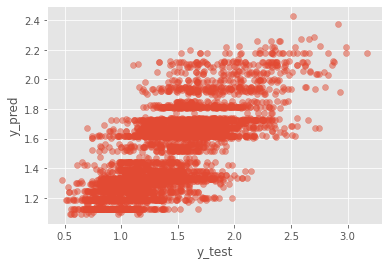

In [68]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [69]:
mean_squared_error(y_test,y_pred)

0.08553580195809304

## RMSE

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2924650439934541

## r2 score

In [71]:
r2_score(y_test,y_pred)

0.4879526522468346

## AdaBoost Regressor Model - 48.79%

### In prediction AdaBoost Regressor Model with AveragePrices:
##### I had done this prediction by taking AveragePrices as an output variable which is continuity in nature so that why I’m using the regression technique.
##### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
##### After calculating adjusted R2 score I used Scatter plot of AdaBoost Regressor Model,MSE,and RMSE I got r2 score of AdaBoost Regressor Model - 48.79%.

# Hyperparameter Tuning in Random Forest Regressor Model

#### After Completing All the model Prediction I Got Random Forest Regressor Model Accuracy Score is the best to do hyperparameter tuning to improve the accuracy by using Randomized Search CV.

### Using RandomizedSearchCV method for improving the r2 score

In [72]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [73]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [74]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  17.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [77]:
prediction = rf_random.predict(x_test)

### Scatter Plot After Hypertuning

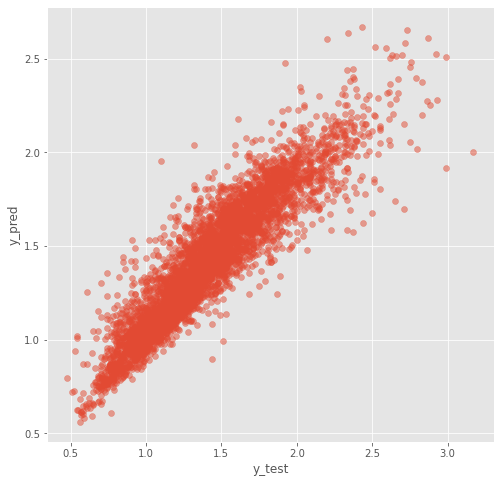

In [78]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [79]:
mean_squared_error(y_test,y_pred)

0.08553580195809304

## RMSE

In [80]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2924650439934541

## r2 score

In [81]:
r2_score(y_test,y_pred)

0.4879526522468346

#### In prediction HyperParameter Tuning of Random Forest Regressor with the help of Randomized Search Cv:
###### I had done this prediction by taking Next_Tmax as an output variable which is continuity in nature so that why I’m using the regression technique.
###### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
###### After calculating adjusted R2 score I used Scatter plot of Random Forest Regressor After Hypertuning ,MSE,and RMSE I got r2 score of Random Forest Regressor After Hypertuning is - 48.79%.
###### Which shows that Random Forest Regressor doesnot increase it accuracy and there is no improvement in this algorithmn.

## Regularization Method

#### A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
#### Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [82]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [83]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [84]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

2.1085797826050993e-06

In [85]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.1085797826050993e-06)

In [86]:
lasso_reg.score(x_test,y_test)

0.41252510655139896

#### I have try to improve the accuracy score by using lasso regularization 41.25% but no increase in Accuracy Value.

## Saving the Best Model of Averahge Price Label

In [87]:
import pickle

In [88]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### After completing Temperature prediction with Next_Tmax Label I got Random Forest Regressor Model accuracy score high so I save Random Forest Regressor Model.

# Observation

### In prediction:
###### I had done this prediction by taking Average price as an output variable which is continuity in nature so that why I’m using the regression technique
###### While calculating the best random state the 370 is best state which providing the highest R2 score value for this model.
###### After using the RandomizedSearchCV, I can find the best param and then I used these param for that model.
###### After using the best param I can get the best R2 score and the model is Random Forest Regressor Model.
###### There are following matrices which I find, and which are providing the best score.

# Conclusion:

### I’ll briefly discuss how I approached this problem of predicting Avocado.
###### a) I have Avocado datastet from which I had to extract information.
###### b) I have done 1 label as the dataset speaks:
   AveragePrice
###### c) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
###### d) After from all datasets, I preprocessed the data using replacing all zeros.
###### e) I did exploratory data analysis on main data frame and tried to see all visualizations.
###### f) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot.
###### g) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
###### h) After from all these i split the Features & Labels into 2 parts.
###### i) On this data, I have applied our machine learning models such as Linear Regression, Random Forest Reggessor,Decision Tree Regressor and AdaBoostRegressor.
###### j) After which I found Random Forest Regressor has the High r2 score and best amng all the models.
###### In the modeling Building section, I have seen after hyperparameter tuning: Random Forest Regressor has the highest Best Score (83.63%) with AveragePrice Label.

&

###### Hyperparameter tuning Value with AveragePrice Label of Random Forest Regressor is 48.79%.
###### k)Based on the model scores, to predict Avocado Random Forest Regressor seems to be the best model for this dataset.